In [76]:
import pandas as pd
import numpy as np

In [77]:
raw_data = pd.read_csv('./Data/train_data.csv')
raw_label = pd.read_csv('./Data/train_label.csv')

In [78]:
data = raw_data.drop(columns=['id'])
data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,3.057242,2.895826,6.875436,8.993819,0.0,7.524307,0.632920,0.0,0.0,...,7.359934,9.423847,10.617155,3.294341,10.446329,11.869031,10.742309,9.763863,5.315479,1.407081
1,0.0,1.256286,2.155684,6.898692,9.994891,0.0,7.849955,0.489235,0.0,0.0,...,4.929370,8.641929,9.352719,6.721947,10.154147,13.197991,10.320067,9.413768,8.076142,0.000000
2,0.0,2.480989,2.560446,7.026789,10.046537,0.0,5.643527,0.000000,0.0,0.0,...,5.222897,7.781530,9.610392,5.847346,9.966315,11.994916,9.122202,8.844226,4.175285,0.000000
3,0.0,2.694992,2.588613,7.355571,9.692434,0.0,7.194914,0.420509,0.0,0.0,...,6.367313,9.007605,10.293253,6.116005,10.235296,11.648722,10.143319,9.739455,4.959696,0.000000
4,0.0,4.199900,2.582243,6.706075,10.302936,0.0,6.419613,0.000000,0.0,0.0,...,5.902896,8.868196,10.540942,7.567256,10.989366,11.466535,9.944176,10.677420,4.689176,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.0,4.814166,3.928105,5.854978,8.846054,0.0,8.960601,2.263846,0.0,0.0,...,7.244916,8.829567,9.903676,5.870767,10.341775,11.360907,10.776088,9.783543,4.544801,0.000000
465,0.0,6.237034,5.043235,6.297397,10.391415,0.0,7.669941,0.913033,0.0,0.0,...,5.669299,8.437523,10.524503,1.467801,9.666187,11.258572,10.062033,9.018030,7.737159,0.000000
466,0.0,2.145808,1.622462,7.065120,10.282903,0.0,7.558979,0.509341,0.0,0.0,...,4.602160,8.037113,9.957584,6.936873,9.331293,12.381094,9.667309,10.350906,6.020940,0.000000
467,0.0,3.028304,2.156138,6.459537,9.488378,0.0,5.319195,0.000000,0.0,0.0,...,6.436851,8.557640,9.749657,5.406037,10.590297,11.449572,9.303614,9.228160,4.403943,0.000000


In [79]:
label = raw_label.drop(columns=['id'])
label

,Class
0,KIRC
1,BRCA
2,LUAD
3,BRCA
4,BRCA
...,...
464,KIRC
465,LUAD
466,BRCA
467,KIRC


In [80]:
from sklearn.preprocessing import OneHotEncoder

# 創建OneHotEncoder對象
enc = OneHotEncoder()

# 將訓練集和測試集的標籤都用於擬合Encoder
enc.fit(label)

# 將訓練集和測試集的標籤都轉換成One-Hot編碼
label_enc = enc.transform(label).toarray()

# 新增一個column並填入0
unknown_col = np.zeros((label_enc.shape[0], 1))

# 將unknown column插入到最後一欄
label_enc = np.hstack((label_enc, unknown_col))

label_enc

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [81]:
from sklearn.preprocessing import MinMaxScaler

# 將數據標準化到[0, 1]範圍內
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[0.        , 0.49017567, 0.51246598, ..., 0.49474902, 0.43975768,
        0.26780456],
       [0.        , 0.20142364, 0.38148526, ..., 0.40355403, 0.70232924,
        0.        ],
       [0.        , 0.39778345, 0.45311473, ..., 0.25519629, 0.33131177,
        0.        ],
       ...,
       [0.        , 0.344043  , 0.28712239, ..., 0.64766554, 0.5068553 ,
        0.        ],
       [0.        , 0.4855359 , 0.38156546, ..., 0.35520578, 0.35305979,
        0.        ],
       [0.        , 0.53052688, 0.70617622, ..., 0.61159908, 0.47119285,
        0.        ]])

In [82]:
data.shape[1]

20531

In [83]:
# 將數據轉換成圖像矩陣格式
img_shape = (200, 103)  # 圖像大小

zeros_array = np.zeros((data.shape[0], (img_shape[0] * img_shape[1] - data.shape[1])))
data = np.hstack((data, zeros_array))

In [84]:
num_channels = 1  # 單通道灰度圖像
data = data.reshape((data.shape[0], img_shape[0], img_shape[1], 1))

print(data.shape)  # (樣本數, 高度, 寬度, 通道數)

(469, 200, 103, 1)


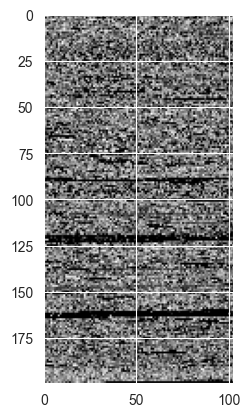

In [85]:
import matplotlib.pyplot as plt

# Reshape to image format
img = data[0].reshape(200, -1)

# Display image as grayscale
plt.imshow(img, cmap='gray')
plt.show()

In [86]:
# 建立模型
from tensorflow import keras
from keras import regularizers

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(data.shape[1], data.shape[2]), kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 198, 8)            2480      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 99, 8)            0         
 g1D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 99, 8)             0         
                                                                 
 batch_normalization_17 (Bat  (None, 99, 8)            32        
 chNormalization)                                                
                                                                 
 conv1d_11 (Conv1D)          (None, 97, 16)            400       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 48, 16)          

In [87]:
from sklearn.model_selection import KFold

# 定義交叉驗證參數
n_splits = 5 # 設置5折交叉驗證
k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [88]:
# 增加 callbacks
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 進行交叉驗證
scores = []
for train_index, test_index in k_fold.split(data):
    # 將數據分為訓練集和測試集
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = label_enc[train_index], label_enc[test_index]

     # 編譯模型
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # 訓練模型
    model.fit(X_train, y_train, epochs=200, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # 評估模型
    score = model.evaluate(X_test, y_test, verbose=0)
    scores.append(score[1])

# 輸出交叉驗證結果
print("Cross-validation accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores) * 100, np.std(scores) * 100))

Epoch 1/200
2/2 [==============================] - 2s 211ms/step - loss: 1.7861 - accuracy: 0.2827 - val_loss: 1.4868 - val_accuracy: 0.0426
Epoch 2/200
2/2 [==============================] - 0s 59ms/step - loss: 1.8416 - accuracy: 0.2667 - val_loss: 1.4660 - val_accuracy: 0.1170
Epoch 3/200
2/2 [==============================] - 0s 59ms/step - loss: 1.6939 - accuracy: 0.3173 - val_loss: 1.4483 - val_accuracy: 0.1596
Epoch 4/200
2/2 [==============================] - 0s 57ms/step - loss: 1.7732 - accuracy: 0.3253 - val_loss: 1.4300 - val_accuracy: 0.1702
Epoch 5/200
2/2 [==============================] - 0s 57ms/step - loss: 1.6629 - accuracy: 0.3493 - val_loss: 1.4143 - val_accuracy: 0.2128
Epoch 6/200
2/2 [==============================] - 0s 56ms/step - loss: 1.5867 - accuracy: 0.3520 - val_loss: 1.3990 - val_accuracy: 0.3085
Epoch 7/200
2/2 [==============================] - 0s 53ms/step - loss: 1.6887 - accuracy: 0.3867 - val_loss: 1.3850 - val_accuracy: 0.3936
Epoch 8/200
2/2 [==

In [89]:
scores

[0.9893617033958435, 1.0, 1.0, 1.0, 1.0]

In [90]:
import datetime

# 獲取當前日期和時間
now = datetime.datetime.now()

# 格式化日期和時間，並作為模型名稱
model_name = f"CNN_Gene_{now.strftime('%Y-%m-%d_%H-%M-%S')}"

# 儲存模型
model.save(f"{model_name}.h5")